In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [6]:
df=pd.read_csv("C:\\Users\\INDIA\\Downloads\\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [12]:
# Check for missing values
missing_values = df.isnull().sum()

# Print missing values
print("Missing Values:\n", missing_values)
data = df.dropna()  

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [13]:
# Check data types
data_types = data.dtypes

# Print data types
print("Data Types:\n", data_types)

Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


In [15]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Print number of duplicates
print("Duplicates: ", duplicates)

# Remove duplicates
data = df.drop_duplicates()

Duplicates:  0


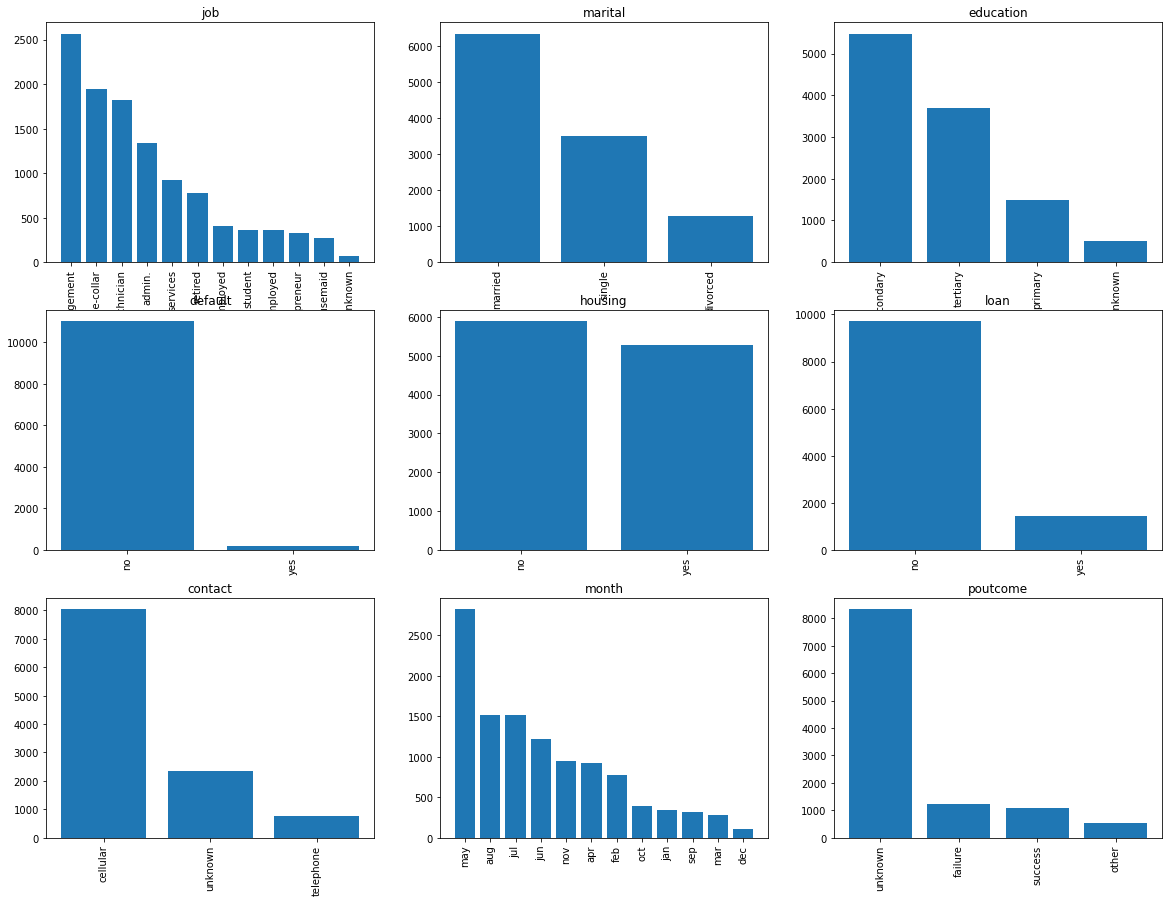

In [9]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1
plt.show()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


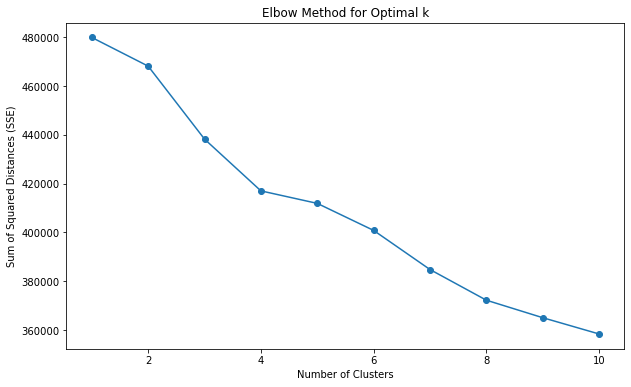

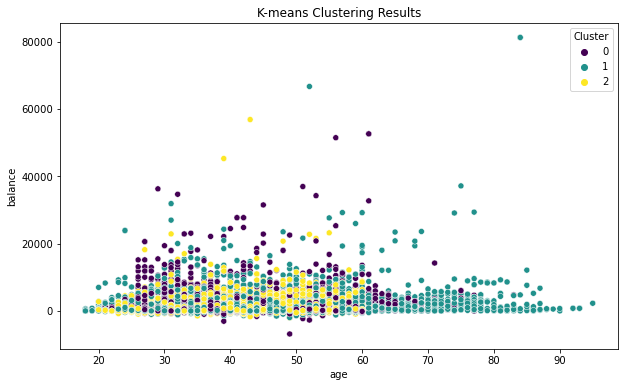

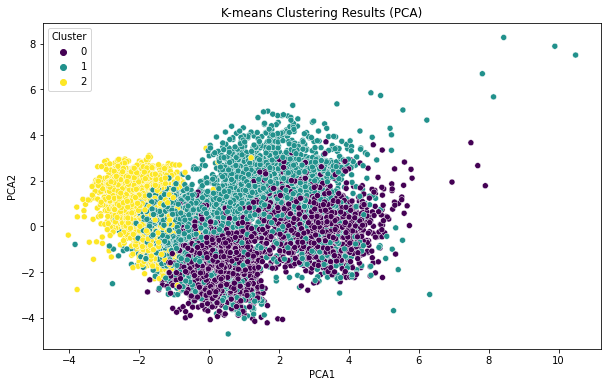

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\INDIA\\Downloads\\bank.csv")

# Display the columns to understand the structure
print(df.columns)

# Encode categorical variables
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply pd.get_dummies to all categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal k (for example, k=3)
optimal_k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
df['Cluster'] = clusters

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', hue='Cluster', data=data, palette='viridis')
plt.title('K-means Clustering Results')
plt.show()

# If there are more than two dimensions, use PCA to reduce to two dimensions for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-means Clustering Results (PCA)')
plt.show()


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')
Accuracy: 0.8471185428486115
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1742
           1       0.82      0.87      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



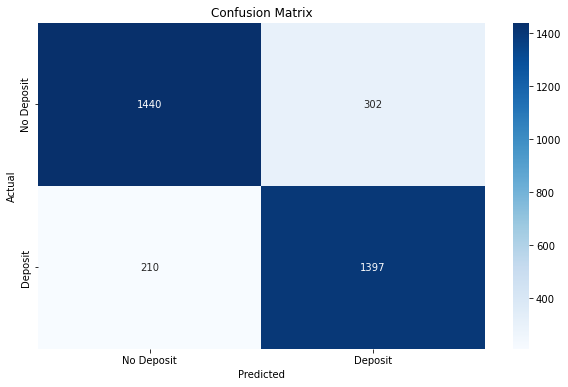

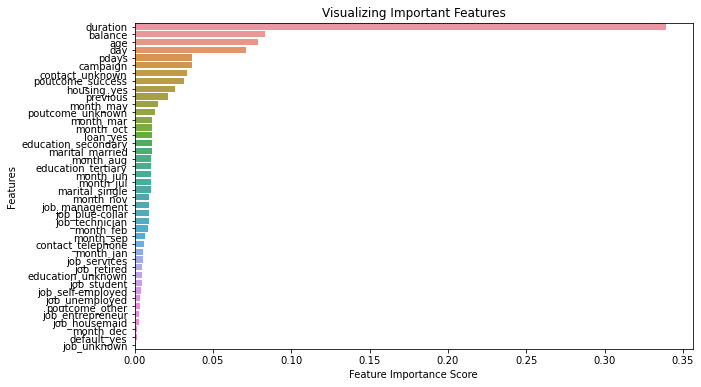

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\INDIA\\Downloads\\bank.csv")

# Display the columns to understand the structure
print(df.columns)

# Identify the target column after encoding
# The target column should be 'deposit' and we will convert it to binary (0/1)
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

# Encode categorical variables
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply pd.get_dummies to all categorical columns
df= pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df.drop('deposit', axis=1)
y = df['deposit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Deposit', 'Deposit'], yticklabels=['No Deposit', 'Deposit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')
Coefficients: [ 375.93041656   28.59161322   -5.43308878    0.82109994  -63.38650654
   24.25936996   23.3379301    49.02400952  -58.28311331  100.89996444
   34.37221511   91.2426712     2.34201926   59.62172455  129.38688109
   -5.02191274  -11.24257616  131.43044845  186.25658891  -41.78488894
  135.11565645    2.65575147 -146.96958674 -105.56506467 -161.4719658
  121.54096121  -47.2545831  -112.6759155   -36.66781526  -40.9223612
 -136.74489521 -183.9105799     2.45936584   11.02567699  -68.93250522
  147.51094566  -50.18840316  -29.75837199   82.70014508   71.29209855
  -17.46054418  107.94682727]
Intercept: 1531.5680295242876


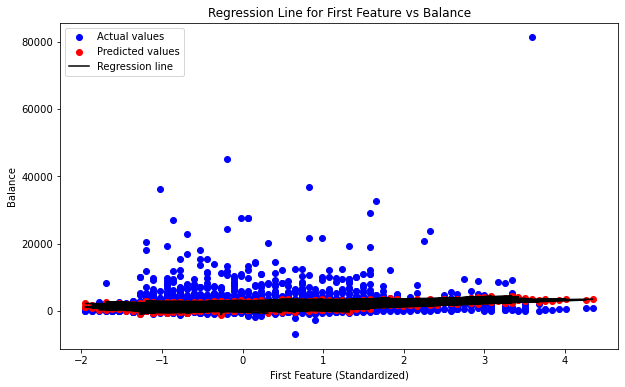

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\INDIA\\Downloads\\bank.csv")

# Display the columns to understand the structure
print(df.columns)

# We'll use 'balance' as the target variable
target_column = 'balance'

# Encode categorical variables
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply pd.get_dummies to all categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Print model coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Plotting the regression line (for one feature vs target)
# For visualization purposes, let's use the first feature in the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual values')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted values')
plt.plot(X_test[:, 0], y_pred, color='black', label='Regression line')
plt.title('Regression Line for First Feature vs Balance')
plt.xlabel('First Feature (Standardized)')
plt.ylabel('Balance')
plt.legend()
plt.show()


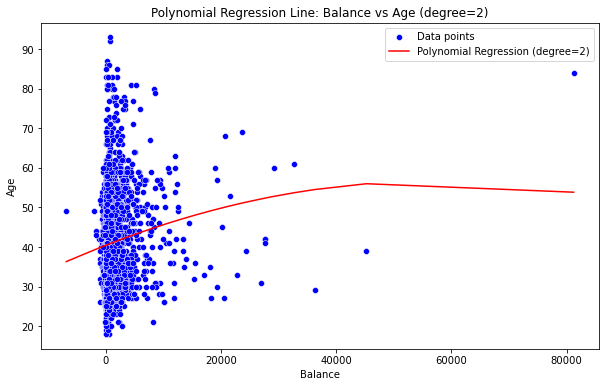

In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Select features
X = df[['balance']]
y = df['age']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # You can change the degree to any positive integer
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predict on the test set
y_poly_pred = poly_reg.predict(X_poly_test)

# Sort the values for better plotting
sorted_idx = X_test['balance'].argsort()
X_test_sorted = X_test['balance'].iloc[sorted_idx]
y_poly_pred_sorted = y_poly_pred[sorted_idx]

# Plot the polynomial regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['balance'], y=y_test, color='blue', label='Data points')
plt.plot(X_test_sorted, y_poly_pred_sorted, color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel('Balance')
plt.ylabel('Age')
plt.title(f'Polynomial Regression Line: Balance vs Age (degree={degree})')
plt.legend()
plt.show()
